In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from numba import njit, types
from numba.typed import Dict as NumbaDict


In [ ]:
def estado_ini(L):
  M = np.zeros(L*L)
  M[(L*L)//2 + L//2] = 1
  return M

int_array = types.int64[:]


@njit(nopython=True)
def vizinhos(L,N):
    #Define a tabela de vizinhos 
    viz = np.zeros((N,4),dtype=np.int16)
    for k in range(N):
        viz[k,0]=k+1
        if (k+1) % L == 0: viz[k,0] = k+1-L
        viz[k,1] = k+L 
        if k > (N-L-1): viz[k,1] = k+L-N
        viz[k,2] = k-1 
        if k % L == 0: viz[k,2] = k+L-1
        viz[k,3] = k-L 
        if k < L: viz[k,3] = k+N-L
    return viz

/usr/local/lib/python3.7/dist-packages/numba/core/decorators.py:252: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [ ]:
cmap = mpl.colors.ListedColormap(["white","blue","yellow"])
bounds=[0,1,2,3]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


In [ ]:
def print_matrix(M, N, L):
  to_print = np.zeros((L, L), dtype=np.int8)

  for i in range(L):
    to_print[i] = M[L*i : L*i + L]

  plt.imshow(to_print, cmap=cmap, norm=norm)
  plt.show()

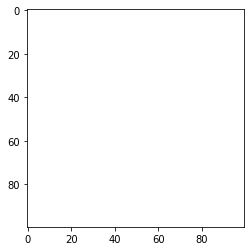

In [ ]:
L = 100
N = L*L
M = estado_ini(L)
print_matrix(M, N, L)

In [ ]:
def contato(h,p):
  total = 0
  atual = p

  while h>0:
    total += atual
    atual *= (1-p)
    h = h-1

  return np.random.choice(np.array([0, 1]), 1, p=np.array([1-total, total]))[0]

In [ ]:
def iteracao(M,viz,prob):
  N=len(M)
  M_novo = np.zeros(N, dtype=np.int32)

  sus = rec = infec = 0

  for i in range(N):

    if M[i] == 0:
      h = 0
      for j in range(4):
        if M[viz[i][j]] == 1:
          h = h+1
      M_novo[i] = contato(h, prob[0])
    
    elif M[i] == 1:
      M_novo[i] = np.random.choice(np.array([1, 2]), 1, p=np.array([1-prob[1],prob[1]]))
    
    else:
      M_novo[i] = 2

    if M[i] == 0:
      sus += 1
    if M[i] == 1:
      infec += 1
    if M[i] == 2:
      rec += 1

  return sus, infec, rec, M_novo

In [ ]:
def metropolis(M,prob,L,niter):
  viz = vizinhos(L, L*L)

  sus_list = []
  infec_list = []
  rec_list = []
  
  M_0 = M_25 = M_50 = M_75 = M_100 = None

  for it in range(niter):
    sus, infec, rec, M = iteracao(M, viz, prob)

    if it == 0:
      M_0 = M.copy()

    if it == 25:
      M_25 = M.copy()

    if it == 50:
      M_50 = M.copy()

    if it == 75:
      M_75 = M.copy()

    if it == 100:
      M_100 = M.copy()

  sus_list.append(sus)
  infec_list.append(infec)
  rec_list.append(rec)
  
  return {
      'M': M, 
      'sus': sus_list, 
      'infec': infec_list, 
      'rec': rec_list, 
      'M_0': M_0,
      'M_25': M_25, 
      'M_50': M_50, 
      'M_75': M_75, 
      'M_100': M_100 
    }

In [ ]:
%%time
L = 100
N = L*L
M = estado_ini(L)
prob = np.array([0.15, 0.01])
niter = 101
metrics = metropolis(M, prob, L, niter)



CPU times: user 58 s, sys: 268 ms, total: 58.3 s
Wall time: 58.1 s


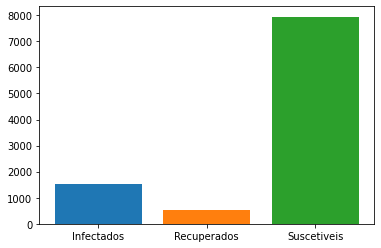

In [ ]:
plt.bar('Infectados', metrics['infec'], label = 'Infectados')
plt.bar('Recuperados', metrics['rec'], label = 'Recuperados')
plt.bar('Suscetiveis', metrics['sus'], label = 'Suscetiveis')
plt.show()

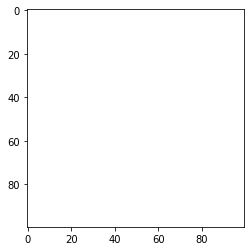

In [ ]:
print_matrix(metrics['M_0'], N, L)
plt.show()

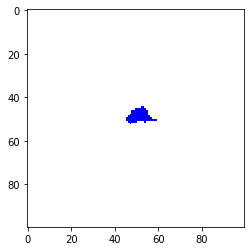

In [ ]:
print_matrix(metrics['M_25'], N, L)
plt.show()

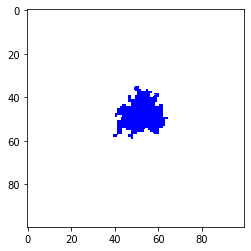

In [ ]:
print_matrix(metrics['M_50'], N, L)
plt.show()

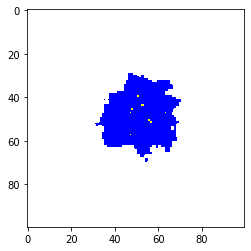

In [ ]:
print_matrix(metrics['M_75'], N, L)
plt.show()

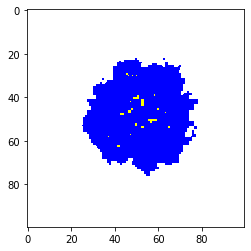

In [ ]:
print_matrix(metrics['M'], N, L)
plt.show()

In [ ]:
%%time
L = 100
N = L*L
M = estado_ini(L)
prob = np.array([0.30, 0.01])
niter = 101
metrics1 = metropolis(M, prob, L, niter)

CPU times: user 55.7 s, sys: 250 ms, total: 55.9 s
Wall time: 55.7 s


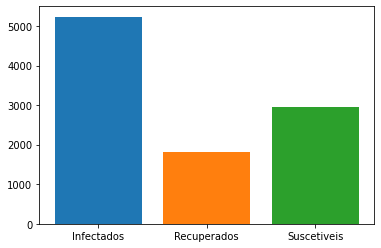

In [ ]:
plt.bar('Infectados', metrics1['infec'], label = 'Infectados')
plt.bar('Recuperados', metrics1['rec'], label = 'Recuperados')
plt.bar('Suscetiveis', metrics1['sus'], label = 'Suscetiveis')
plt.show()

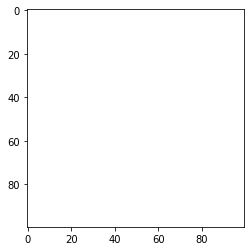

In [ ]:
print_matrix(metrics1['M_0'], N, L)
plt.show()


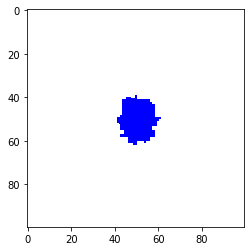

In [ ]:
print_matrix(metrics1['M_25'], N, L)
plt.show()

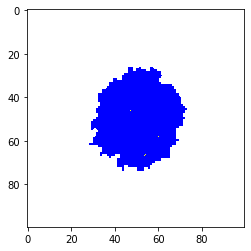

In [ ]:
print_matrix(metrics1['M_50'], N, L)
plt.show()


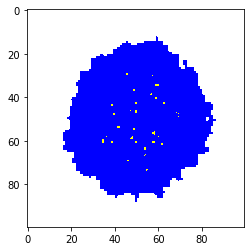

In [ ]:
print_matrix(metrics1['M_75'], N, L)
plt.show()

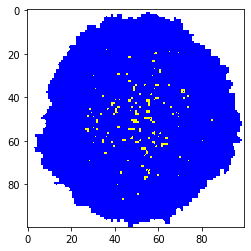

In [ ]:
print_matrix(metrics1['M'], N, L)
plt.show()

In [ ]:
%%time
L = 100
N = L*L
M = estado_ini(L)
prob = np.array([0.20, 0.05])
niter = 101
metrics2 = metropolis(M, prob, L, niter)


CPU times: user 55.4 s, sys: 190 ms, total: 55.6 s
Wall time: 55.3 s


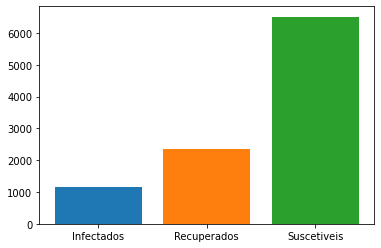

In [ ]:
plt.bar('Infectados', metrics2['infec'], label = 'Infectados')
plt.bar('Recuperados', metrics2['rec'], label = 'Recuperados')
plt.bar('Suscetiveis', metrics2['sus'], label = 'Suscetiveis')
plt.show()

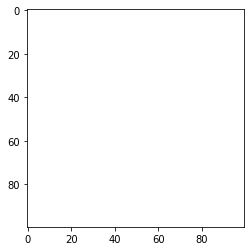

In [ ]:
print_matrix(metrics2['M_0'], N, L)
plt.show()

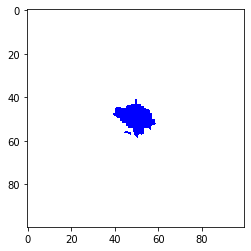

In [ ]:
print_matrix(metrics2['M_25'], N, L)
plt.show()


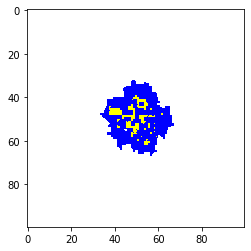

In [ ]:
print_matrix(metrics2['M_50'], N, L)
plt.show()

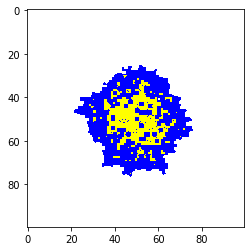

In [ ]:
print_matrix(metrics2['M_75'], N, L)
plt.show()


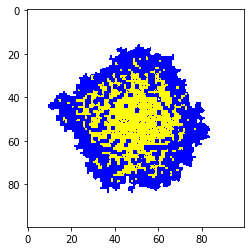

In [ ]:
print_matrix(metrics2['M'], N, L)
plt.show()

In [ ]:
%%time
stats = np.zeros((3, 3))
for i in range(5):

  L = 100
  N = L*L
  niter = 101

  prob0 = np.array([0.15, 0.01])
  prob1 = np.array([0.30, 0.01])
  prob2 = np.array([0.20, 0.05])

  met0 = metropolis(estado_ini(L), prob0, L, niter)
  met1 = metropolis(estado_ini(L), prob1, L, niter)
  met2 = metropolis(estado_ini(L), prob2, L, niter)

  stats[0][0] += met0['sus'][-1]
  stats[0][1] += met0['infec'][-1]
  stats[0][2] += met0['rec'][-1]

  stats[1][0] += met1['sus'][-1]
  stats[1][1] += met1['infec'][-1]
  stats[1][2] += met1['rec'][-1]

  stats[2][0] += met2['sus'][-1]
  stats[2][1] += met2['infec'][-1]
  stats[2][2] += met2['rec'][-1]

for i in range(3):
  for j in range(3):
    stats[i][j] /= 5

print("Simulação com:", prob0)
print("Suscetíveis:", stats[0][0], "Infectados:", stats[0][1], "Recuperados:", stats[0][2])
print("Simulação com:", prob1)
print("Suscetíveis:", stats[1][0], "Infectados:", stats[1][1], "Recuperados:", stats[1][2])
print("Simulação com:", prob2)
print("Suscetíveis:", stats[2][0], "Infectados:", stats[2][1], "Recuperados:", stats[2][2])

Simulação com: [0.15 0.01]
Suscetíveis: 7882.8 Infectados: 1594.6 Recuperados: 522.6
Simulação com: [0.3  0.01]
Suscetíveis: 2965.4 Infectados: 5253.6 Recuperados: 1781.0
Simulação com: [0.2  0.05]
Suscetíveis: 6555.8 Infectados: 1135.2 Recuperados: 2309.0
CPU times: user 14min 2s, sys: 5.02 s, total: 14min 7s
Wall time: 14min 2s


In [ ]:
%%time
L = 50
N = L*L
M = estado_ini(L)
niter = 101
tx_infec = [0.10, 0.15, 0.20, 0.25, 0.30]
tx_rec = [0.01, 0.03, 0.05, 0.07]
metrics = dict()

for ti in tx_infec:
  for tr in tx_rec:
    metrics[(ti, tr)] = metropolis(M, np.array([ti, tr]), L, niter)


CPU times: user 4min 4s, sys: 1.81 s, total: 4min 6s
Wall time: 4min 4s


In [ ]:
def get_to_print(M, N, L):
  to_print = np.zeros((L, L), dtype=np.int8)

  for i in range(L):
    to_print[i] = M[L*i : L*i + L]

  return to_print

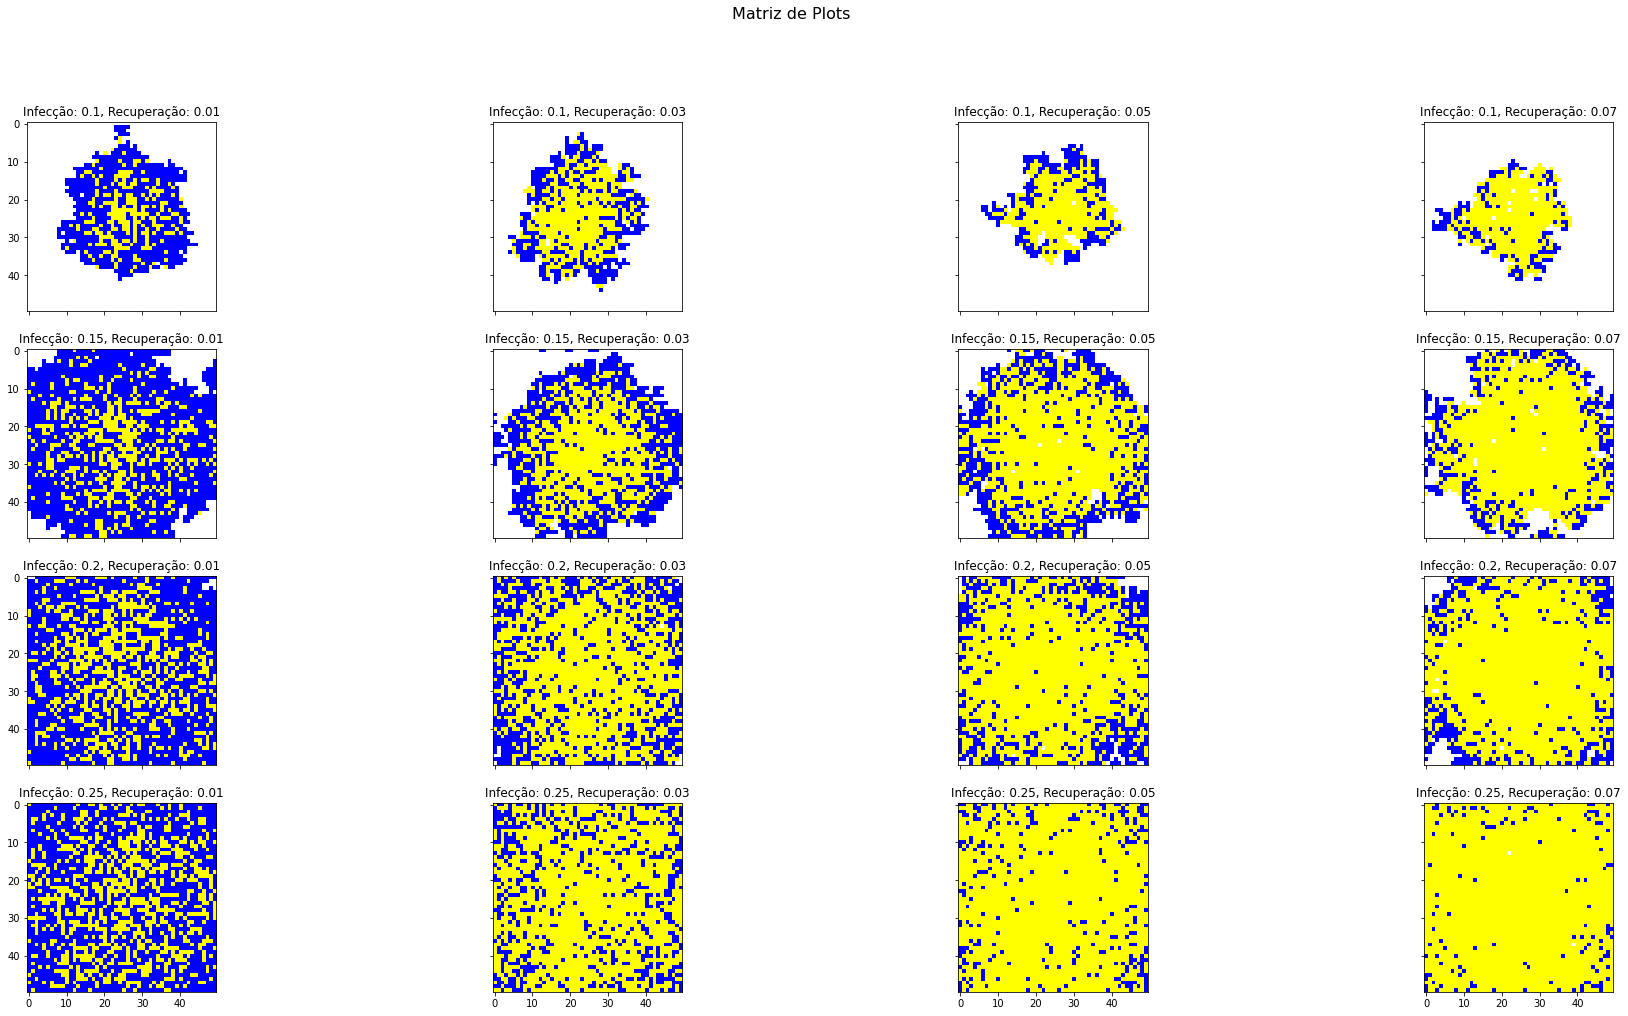

In [ ]:
L = 50
N = L*L
fig, ax = plt.subplots(4, 4, sharex='all', sharey='all', figsize=(32,16))
fig.suptitle("Matriz de Plots", fontsize=16)

for i in range(4):
  for j in range(4):
    title = "Infecção: " + str(tx_infec[i]) + ", Recuperação: " + str(tx_rec[j])
    ax[i, j].title.set_text(title)
    ax[i, j].imshow(get_to_print(metrics[(tx_infec[i], tx_rec[j])]['M'], N, L), cmap=cmap, norm=norm)

plt.show()